# Examen número 1: Métodos computacionales para físicos.

**NOTA:** El examen consta de 2 partes y se califica sobre 100 puntos. No puede usar ningún material adicional al examen (libros, notas, páginas de internet, etc), ni tampoco consultar a ninguna persona durante la realizacón del mismo. Recuerde que el fraude académico está sancionado en el Reglamento Estudiantil. El examen tiene una duración de 2 horas. Debe estar claramente escrito, desarrollado y justificado. Respuesta sin sustentación pierde sus puntos.


**Profesor:** Hernán David Salinas Jiménez.

Instituto de Física

Universidad de Antioquia




1. (70Pts). Un objeto que cae verticalmente en el aire sujeto a la resistencia del aire  y también a la fuerza de gravedad. Suponga que el objeto tiene una masa m y cae desde una  altura $s_0$ y que la altura del objeto después de $t$ segundos es:

\begin{equation}
s(t)=s_0-\frac{mg}{k} t + \frac{m^2g}{k^2}(1-e^{-kt/m})
\end{equation}

donde $g=9.8 \mathrm{m/s}$, $k=0.148\mathrm{kg\ s\ /m}$  es el coeficiente de resistencia con el aire. Suponga que $s_0 = 900m$ y  $m = 0.25\mathrm{kg}$. Para la situación planteada:  


a (10 Pts). Realizar un gráfico de $s$ como función del tiempo, para ello cree una función para  $s(t)$  llamada caida:

  ```python
  def caida():

    return
  ```


b (30 Pts). Determine el tiempo de caida del objeto, empleando el metodo de:

  - Secante

  - Newton-Rapshon.

  - Punto Fijo




c (30 Pts). Determine la el tiempo de caida para 10 valores de la masa entre $0.25$Kg y $1$Kg.

Ayuda: Para comprobar que el cálculo de la derivada es el adecuado, se puede ayudar de la libreria de sympy. En el siguiente ejemplo se muestra el uso de la derivada para los primeros términos del problema:

```python
import sympy as sp
x=sp.symbols('x')
m=sp.symbols('m')
g=sp.symbols('g')
k=sp.symbols('k')
s0=sp.symbols('s0')
t=sp.symbols('t')

f = lambda t: s0-m*g*t/k
# Primera derivada
sp.diff(f(t), t, 1)

Métodos

scipy.optimize.newton
scipy.optimize.fixed_point
```


2.(30 Pts) Para el siguiente dataSet que contiene información del clima de un lugar determinado realizar lo siguiente:  ([Clima Data set](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)).

a. Leer el data set.

b. Listar todas las columnas como una lista.

c. Determinar los elemenntos únicos de la columna Wheater

d. Crear un filtro para la columna  Wheater cuando toma el valor de  "Cloudy"

e. Para el filtro anterior,  realizar un gráfico de la columna "Temp_C" , "Press_kPa" como función del tiempo.


Ayudas.

Para generar la columna del  tiempo en numeral e necesario para la graficación,  emplee la siguiente linea:
```python
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')
```

df.Time será la columna a lo largo de la cordenada independiente.



Algunos comandos de pandas:


|Comando|	Descripción|
|-------|------------|
|pd.read_csv()|	Lee un archivo CSV y lo convierte en un DataFrame de Pandas
|pd.read_excel()|	Lee un archivo de Excel y lo convierte en un DataFrame de |Pandas|
|pd.read_json()|	Lee un archivo JSON y lo convierte en un DataFrame de Pandas|
|df.head()|	Muestra las primeras filas del DataFrame|
|df.tail()|	Muestra las últimas filas del DataFrame|
|df.info()|	Muestra información sobre el DataFrame|
|df.describe()|	Muestra estadísticas descriptivas del DataFrame|
|df.dropna()|	Elimina filas con valores faltantes|
|df.drop_duplicates()|	Elimina filas duplicadas|
|df.groupby()	|Agrupa el DataFrame por una o más columnas|
|df.sort_values()|	Ordena el DataFrame por una o más columnas|
|df.to_csv()|	Guarda el DataFrame como un archivo CSV|
|df.loc[condicion]|	Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones|
|df[df["columna"]== x]|	Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable|

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

In [13]:
# punto 2
#a. Leer el data set.
url= "https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/Weather%20Data.csv"
df= pd.read_csv(url)
df
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')

In [7]:
#b. Listar todas las columnas como una lista.
c1=df['Date/Time'].tolist()
c2=df['Temp_C'].tolist()
c3=df['Dew Point Temp_C'].tolist()
c4=df['Rel Hum_%'].tolist()
c5=df['Wind Speed_km/h'].tolist()
c6=df['Visibility_km'].tolist()
c7=df['Press_kPa'].tolist()
c8=df['Weather'].tolist()

In [14]:
#c. Determinar los elemenntos únicos de la columna Wheater
uni=df['Weather'].unique()
uni

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [15]:
#d.Crear un filtro para la columna Wheater cuando toma el valor de "Cloudy"
fil= df.Weather =="Cloudy"
df1= df[fil].copy()
df1

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Time
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy,2012-01-01 17:00:00
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy,2012-01-01 20:00:00
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy,2012-01-01 21:00:00
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy,2012-01-01 23:00:00
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy,2012-01-02 01:00:00
...,...,...,...,...,...,...,...,...,...
8761,12/31/2012 1:00,-10.7,-14.0,77,15,25.0,101.50,Cloudy,2012-12-31 01:00:00
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy,2012-12-31 02:00:00
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy,2012-12-31 04:00:00
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy,2012-12-31 05:00:00


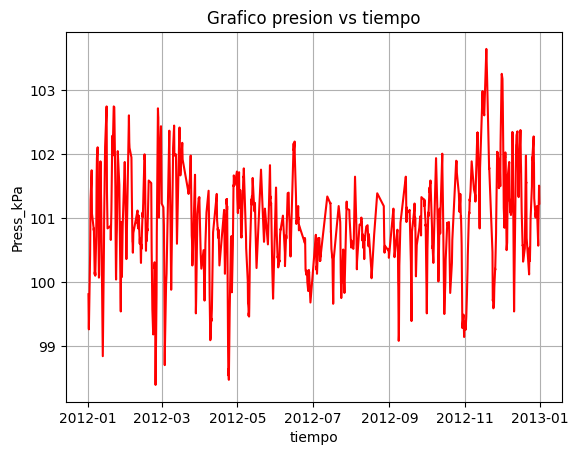

In [18]:
#e. Para el filtro anterior, realizar un gráfico de la columna "Temp_C" , "Press_kPa" como función del tiempo.

plt.figure()
plt.plot(df1.Time,df1.Press_kPa,"red")
plt.xlabel("tiempo")
plt.ylabel("Press_kPa")
plt.title("Grafico presion vs tiempo")
plt.grid()

plt.show()

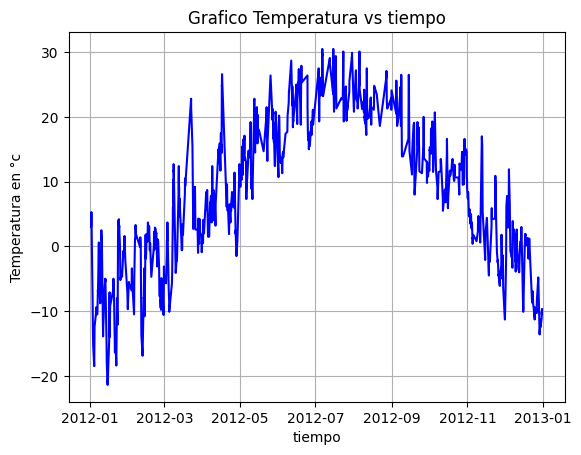

In [20]:
plt.figure()
plt.plot(df1.Time,df1.Temp_C,"blue")
plt.xlabel("tiempo")
plt.ylabel("Temperatura en °c")
plt.title("Grafico Temperatura vs tiempo")
plt.grid()

plt.show()

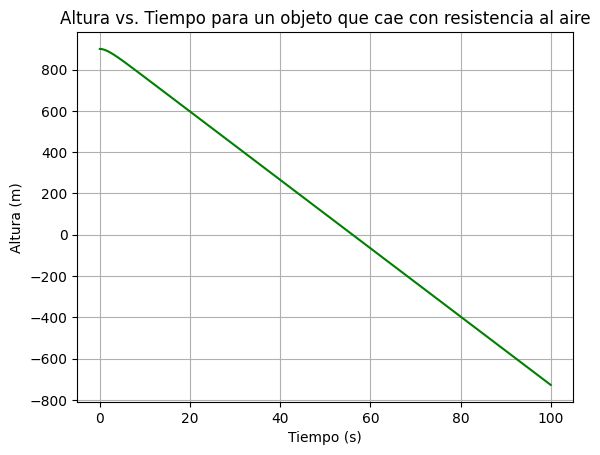

In [32]:
# punto 1:
# Un objeto que cae verticalmente en el aire sujeto a la resistencia del aire y también a la fuerza de gravedad.
# Suponga que el objeto tiene una masa m y cae desde una altura  s0  y que la altura del objeto después de  t  segundos es:

#a.Realizar un gráfico de  s  como función del tiempo, para ello cree una función para  s(t)  llamada caida:
s0=900 #m
m=0.25 #kg
g=9.8 #m/s
k=0.148 #kg


def caida(t,s0,m,k,g):

  p = ((m*g)/k)*t
  s = (((m**2)*g)/k**2)
  te= (1 - (np.exp((-k*t)/m)))

  r = s0 - p + s*te

  return r


t = np.linspace(0, 100, 1000)
s= caida(t,s0,m,k,g)

plt.figure()
plt.plot(t, s,"green")
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)')
plt.title('Altura vs. Tiempo para un objeto que cae con resistencia al aire')
plt.grid()
plt.show()

In [54]:
#b) Determine el tiempo de caida del objeto, empleando el metodo de:

#Secante, Newton-Rapshon,Punto Fijo.

#secante

def func(t):
    return caida(t,s0,m,k,g) - 0

t0 = 0
t1 = 10


tc_secante = optimize.newton(func, t0, t1)

print("Tiempo de caída (secante):", tc_secante, "segundos")



NameError: ignored

In [49]:
#Newton-Rapshon
# Definición de la derivada de la función
def derivada_func(t):
    return -(m * g * k) + (2 * m ** 2 * g * k ** 2 * np.exp(-k * t / m))

tc_newton = optimize.newton(func, t0, fprime=derivada_func)

print("Tiempo de caída (Newton-Raphson):", tc_newton, "segundos")



<ipython-input-32-2f6e5a98b5f2>:16: RuntimeWarning: overflow encountered in exp
  te= (1 - (np.exp((-k*t)/m)))
<ipython-input-49-e7b176f9d42c>:4: RuntimeWarning: overflow encountered in exp
  return -(m * g * k) + (2 * m ** 2 * g * k ** 2 * np.exp(-k * t / m))


RuntimeError: ignored

In [51]:
#punto fijo

def punto_fijo_func(t):
    return t - (caida(t) - 0)


tc_punto_fijo = optimize.fixed_point(punto_fijo_func, x0=5)

print("Tiempo de caída (punto fijo):", tc_punto_fijo, "segundos")


TypeError: ignored

In [57]:
#c) Determine la el tiempo de caida para 10 valores de la masa entre  0.25 Kg y  1 Kg.


def caida(t,s0,m,k,g):

  p = ((m*g)/k)*t
  s = (((m**2)*g)/k**2)
  te= (1 - (np.exp((-k*t)/m)))

  r = s0 - p + s*te



masas = np.linspace(0.25, 1.0, 10)


tiempos_de_caída = []


t0 = 0
t1 = 10


for m_valor in masas:

    def func(t):
        return caida(t,s0,m,k,g) - 0

    tiempo_caida = optimize.newton(func, t0, t1)

    tiempos_de_caída.append(tiempo_caida)

for i, m_valor in enumerate(masas):
    print(f"Masa: {m_valor} kg, Tiempo de caída: {tiempos_de_caída[i]:.2f} segundos")



TypeError: ignored